<p style="height:100px;line-height:100px;background-color:cyan;text-align:center;font-size:52px;font-family:serif;font-weight:bold;color:black;border-radius:12px;">
    Houses Prices
</p>

# **1.**

<p style="height:80px;line-height:80px;background-color:lime;padding-left:12px;font-size:36px;font-family:serif;font-weight:bold;color:black;border:1px outset gold;border-radius:10px;">
    Importing Libraries
</p>

In [1]:
from warnings import filterwarnings
filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as mpp
import seaborn as sb
from CHE_Functions import *

**Warning** <br> Add 'CHE_Functions.py' File to the site-packages or add it's dir to PATH

In [2]:
datasets_path = "DataSets/"

In [3]:
train_data = pd.read_csv(datasets_path + "train.csv")

In [4]:
df_train = train_data.copy()

In [5]:
train_data.shape

(1460, 81)

In [6]:
null_sum = train_data.isna().sum()
for n in null_sum.index:
    print(f'{n}  :  {null_sum[n]}')

Id  :  0
MSSubClass  :  0
MSZoning  :  0
LotFrontage  :  259
LotArea  :  0
Street  :  0
Alley  :  1369
LotShape  :  0
LandContour  :  0
Utilities  :  0
LotConfig  :  0
LandSlope  :  0
Neighborhood  :  0
Condition1  :  0
Condition2  :  0
BldgType  :  0
HouseStyle  :  0
OverallQual  :  0
OverallCond  :  0
YearBuilt  :  0
YearRemodAdd  :  0
RoofStyle  :  0
RoofMatl  :  0
Exterior1st  :  0
Exterior2nd  :  0
MasVnrType  :  872
MasVnrArea  :  8
ExterQual  :  0
ExterCond  :  0
Foundation  :  0
BsmtQual  :  37
BsmtCond  :  37
BsmtExposure  :  38
BsmtFinType1  :  37
BsmtFinSF1  :  0
BsmtFinType2  :  38
BsmtFinSF2  :  0
BsmtUnfSF  :  0
TotalBsmtSF  :  0
Heating  :  0
HeatingQC  :  0
CentralAir  :  0
Electrical  :  1
1stFlrSF  :  0
2ndFlrSF  :  0
LowQualFinSF  :  0
GrLivArea  :  0
BsmtFullBath  :  0
BsmtHalfBath  :  0
FullBath  :  0
HalfBath  :  0
BedroomAbvGr  :  0
KitchenAbvGr  :  0
KitchenQual  :  0
TotRmsAbvGrd  :  0
Functional  :  0
Fireplaces  :  0
FireplaceQu  :  690
GarageType  :  81
Gara

In [7]:
features_for_drop = null_sum[null_sum > 300].index
features_for_drop

Index(['Alley', 'MasVnrType', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature'], dtype='object')

In [8]:
df_train = df_train.drop(columns=features_for_drop)

In [9]:
features_for_fillna = df_train.isna().sum()[df_train.isna().sum() > 0].index
features_for_fillna

Index(['LotFrontage', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond'],
      dtype='object')

In [10]:
df_fillna = df_train[features_for_fillna]
df_fillna.head()

,LotFrontage,MasVnrArea,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Electrical,GarageType,GarageYrBlt,GarageFinish,GarageQual,GarageCond
0,65.0,196.0,Gd,TA,No,GLQ,Unf,SBrkr,Attchd,2003.0,RFn,TA,TA
1,80.0,0.0,Gd,TA,Gd,ALQ,Unf,SBrkr,Attchd,1976.0,RFn,TA,TA
2,68.0,162.0,Gd,TA,Mn,GLQ,Unf,SBrkr,Attchd,2001.0,RFn,TA,TA
3,60.0,0.0,TA,Gd,No,ALQ,Unf,SBrkr,Detchd,1998.0,Unf,TA,TA
4,84.0,350.0,Gd,TA,Av,GLQ,Unf,SBrkr,Attchd,2000.0,RFn,TA,TA


In [11]:
df_fillna.dtypes

LotFrontage     float64
MasVnrArea      float64
BsmtQual         object
BsmtCond         object
BsmtExposure     object
BsmtFinType1     object
BsmtFinType2     object
Electrical       object
GarageType       object
GarageYrBlt     float64
GarageFinish     object
GarageQual       object
GarageCond       object
dtype: object

In [12]:
df_fillna.describe()

,LotFrontage,MasVnrArea,GarageYrBlt
count,1201.000000,1452.000000,1379.000000
mean,70.049958,103.685262,1978.506164
std,24.284752,181.066207,24.689725
min,21.000000,0.000000,1900.000000
25%,59.000000,0.000000,1961.000000
50%,69.000000,0.000000,1980.000000
75%,80.000000,166.000000,2002.000000
max,313.000000,1600.000000,2010.000000


# **2.**

<p style="height:80px;line-height:80px;background-color:lime;padding-left:12px;font-size:36px;font-family:serif;font-weight:bold;color:black;border:1px outset gold;border-radius:10px;">
    Cleaning Data
</p>

## **2.1**

<p style="height:60px;line-height:60px;background-color:navy;padding-left:12px;font-size:32px;font-family:serif;font-weight:bold;color:white;border:1px outset gold;border-radius:8px;">
    Quantitative Data
</p>

### **2.1.1**

<p style="height:50px;line-height:50px;background-color:yellow;padding-left:12px;font-size:28px;font-family:serif;font-weight:bold;color:black;border:1px outset gold;border-radius:6px;">
    LotFrontage Feature
</p>

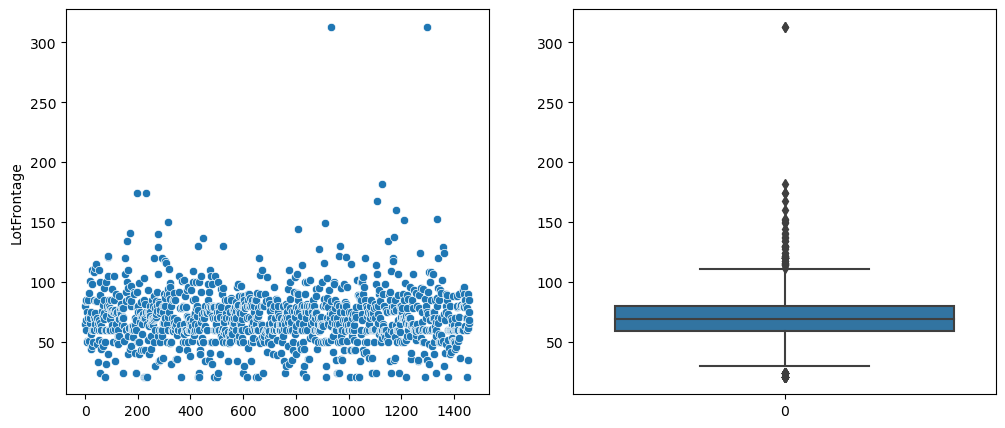

In [13]:
mpp.figure(figsize=(12, 5))

mpp.subplot2grid((1, 2), (0, 0))
sb.scatterplot(df_fillna['LotFrontage'])

mpp.subplot2grid((1, 2), (0, 1))
sb.boxplot(df_fillna['LotFrontage'])

mpp.show()

In [14]:
ndx1_for_drop = df_fillna[df_fillna['LotFrontage'] > 200].index

In [15]:
df_fillna = df_fillna.drop(index=ndx1_for_drop)

In [16]:
lotfrnt_mean = np.ceil(df_fillna['LotFrontage'].mean())
df_fillna['LotFrontage'] = df_fillna['LotFrontage'].fillna(lotfrnt_mean)

### **2.1.2**

<p style="height:50px;line-height:50px;background-color:yellow;padding-left:12px;font-size:28px;font-family:serif;font-weight:bold;color:black;border:1px outset gold;border-radius:6px;">
    MasVnrArea Feature
</p>

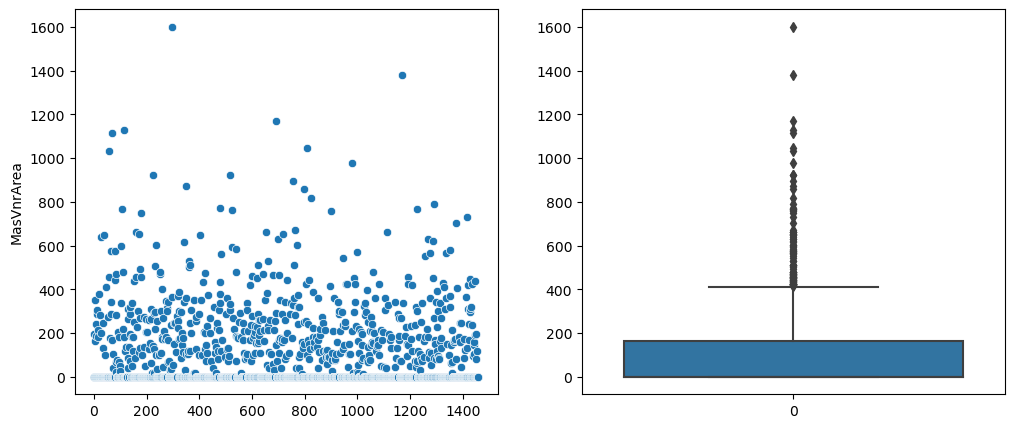

In [17]:
mpp.figure(figsize=(12, 5))

mpp.subplot2grid((1, 2), (0, 0))
sb.scatterplot(df_fillna['MasVnrArea'])

mpp.subplot2grid((1, 2), (0, 1))
sb.boxplot(df_fillna['MasVnrArea'])

mpp.show()

In [18]:
ndx2_for_drop = df_fillna[df_fillna['MasVnrArea'] > 1000].index

In [19]:
df_fillna = df_fillna.drop(index=ndx2_for_drop)

In [20]:
masvnr_mean             = np.ceil(df_fillna['MasVnrArea'].mean())
df_fillna['MasVnrArea'] = df_fillna['MasVnrArea'].fillna(masvnr_mean)

### **2.1.3**

<p style="height:50px;line-height:50px;background-color:yellow;padding-left:12px;font-size:28px;font-family:serif;font-weight:bold;color:black;border:1px outset gold;border-radius:6px;">
    GarageYrBlt Feature
</p>

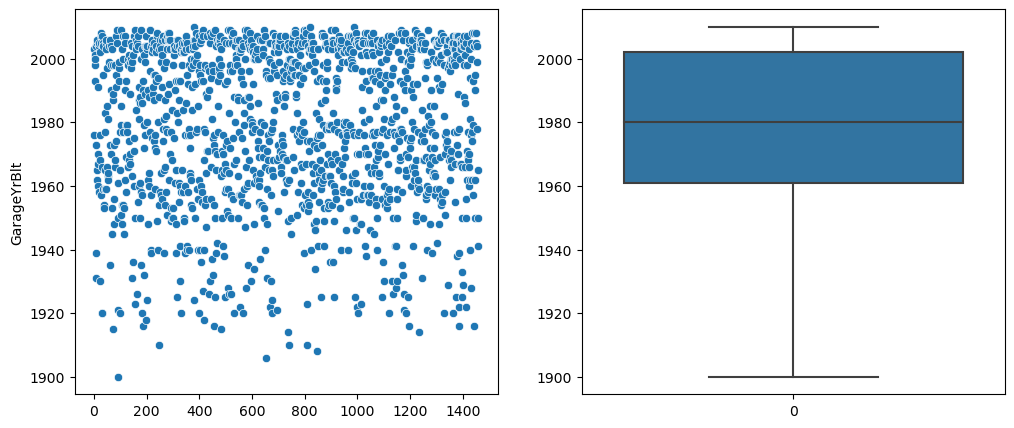

In [21]:
mpp.figure(figsize=(12, 5))

mpp.subplot2grid((1, 2), (0, 0))
sb.scatterplot(df_fillna['GarageYrBlt'])

mpp.subplot2grid((1, 2), (0, 1))
sb.boxplot(df_fillna['GarageYrBlt'])

mpp.show()

In [22]:
garyrblt_mean            = np.ceil(df_fillna['GarageYrBlt'].mean())
df_fillna['GarageYrBlt'] = df_fillna['GarageYrBlt'].fillna(garyrblt_mean)

## **2.2**

<p style="height:60px;line-height:60px;background-color:navy;padding-left:12px;font-size:32px;font-family:serif;font-weight:bold;color:white;border:1px outset gold;border-radius:8px;">
    Qualtitative Data
</p>

<p style="height:50px;line-height:50px;background-color:yellow;padding-left:12px;font-size:28px;font-family:serif;font-weight:bold;color:black;border:1px outset gold;border-radius:6px;">
    Convert Objects Features to Floats
</p>

In [23]:
objects_features = GeneralFunctions.getObjectsFeaturesList(df_fillna)

In [24]:
df_new = GeneralFunctions.ObjectToFloat(df_fillna, objects_features)

<p style="height:50px;line-height:50px;background-color:yellow;padding-left:12px;font-size:28px;font-family:serif;font-weight:bold;color:black;border:1px outset gold;border-radius:6px;">
    Fill NaN Values
</p>

In [25]:
df_new.isna().sum()

LotFrontage      0
MasVnrArea       0
BsmtQual        37
BsmtCond        37
BsmtExposure    38
BsmtFinType1    37
BsmtFinType2    38
Electrical       1
GarageType      81
GarageYrBlt      0
GarageFinish    81
GarageQual      81
GarageCond      81
dtype: int64

In [26]:
df_new = df_new.fillna(1.0)

## **2.3**

<p style="height:60px;line-height:60px;background-color:navy;padding-left:12px;font-size:32px;font-family:serif;font-weight:bold;color:white;border:1px outset gold;border-radius:8px;">
    ReBuilding of Training Data 'df_train'
</p>

In [27]:
ndx_for_drop = ndx1_for_drop.append(ndx2_for_drop)
df_train     = df_train.drop(index=ndx_for_drop)

In [28]:
df_train[features_for_fillna] = df_new[features_for_fillna]

In [29]:
df_train.isna().sum().sort_values(ascending=False)

Id              0
GarageYrBlt     0
Fireplaces      0
Functional      0
TotRmsAbvGrd    0
               ..
MasVnrArea      0
Exterior2nd     0
Exterior1st     0
RoofMatl        0
SalePrice       0
Length: 75, dtype: int64

In [31]:
train_objects_features = GeneralFunctions.getObjectsFeaturesList(df_train)

In [32]:
df_train = GeneralFunctions.ObjectToFloat(df_train, train_objects_features)

In [37]:
corr_train = df_train.corr()

In [53]:
for f in corr_train['SalePrice'].sort_values(ascending=False).index:
    print(f"{f} : {corr_train['SalePrice'][f]}")

SalePrice : 1.0
OverallQual : 0.794749631979914
GrLivArea : 0.7125224702930019
TotalBsmtSF : 0.64560853300325
GarageCars : 0.6453245539875632
GarageArea : 0.6343704892424193
1stFlrSF : 0.6249266339031071
ExterQual : 0.5692173947868563
FullBath : 0.5537301780641568
GarageFinish : 0.5400439814367174
YearBuilt : 0.5323719192472882
TotRmsAbvGrd : 0.5321515133694746
YearRemodAdd : 0.5181835857178688
BsmtQual : 0.49366642360425605
GarageYrBlt : 0.47792104140915254
Fireplaces : 0.471297897948796
KitchenQual : 0.4652264133975919
MasVnrArea : 0.4640999491428371
BsmtFinSF1 : 0.40390583774660815
LotFrontage : 0.3586352467531774
OpenPorchSF : 0.3298661186644992
WoodDeckSF : 0.31526497418478583
2ndFlrSF : 0.2971579226043638
HalfBath : 0.28132392738542
BsmtExposure : 0.2686708440271539
LotShape : 0.2631117224712229
LotArea : 0.2601582572934992
BsmtFullBath : 0.23796661438089972
BsmtUnfSF : 0.21425632754899088
BedroomAbvGr : 0.16047252218836003
RoofStyle : 0.15499132104031638
Neighborhood : 0.1289873

In [54]:
corr_train[corr_train['SalePrice'].abs() > 0.4000].index

Index(['OverallQual', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'ExterQual',
       'Foundation', 'BsmtQual', 'BsmtFinSF1', 'TotalBsmtSF', '1stFlrSF',
       'GrLivArea', 'FullBath', 'KitchenQual', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'SalePrice'],
      dtype='object')

<p style="height:240px;line-height:100px;font-size:64px;background-color:cyan;color:white;padding:20px auto;text-align:center;border:2px outset gold;border-radius:8px;">
    Created by:<br/> <code style="border:1px outset gold;border-radius:10px;">Tarek Ghajary</code>
</p>